In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

Simple d_model=1 Unigram

In [ ]:


class Model(nn.Module):
  def __init__(self, d_vocab, d_model):
    super().__init__()
    self.embed = nn.Embedding(d_vocab,d_model)
    self.lm_head = nn.Linear(d_model,d_vocab, bias=False)
    with torch.no_grad():
      self.lm_head.weight.zero_()

  def forward(self,x ,y):
    x = self.embed(x)
    x = self.lm_head(x)
    #print(x)
    loss = F.cross_entropy(x, y)
    return loss
d_vocab = 10
d_model = 1
probs = torch.tensor([(1+i)/d_vocab for i in range(d_vocab)])  # example probabilities


model = Model(d_vocab, d_model).cuda()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(10000):
  data = torch.multinomial(probs, num_samples=100000, replacement=True)
  input = data[:-1].cuda()
  target = data[1:].cuda()
  loss = model(input, target)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if step%1000==0:
    print(loss)

preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1)
print("Embed:", model.embed.weight)
print("Lm_head:", model.lm_head.weight)
print("Preds:", preds)

tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1519, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1538, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1509, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1509, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1526, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1517, device='cuda:0', grad_fn=<NllLossBackward0>)
Embed: Parameter containing:
tensor([[-0.9952],
        [-1.0101],
        [-1.0097],
        [-1.0083],
        [-1.0082],
        [-1.0080],
        [-1.0076],
        [-1.0101],
        [-1.0093],
        [-1.0086]], device='cuda:0', requires_grad=True)
Lm_head: Parameter containing:
tensor([[ 1.4987],
        [ 0.8103],
        [ 0.4075],
        [ 0.1231],
        [-0.0981],
        [-0.2792]

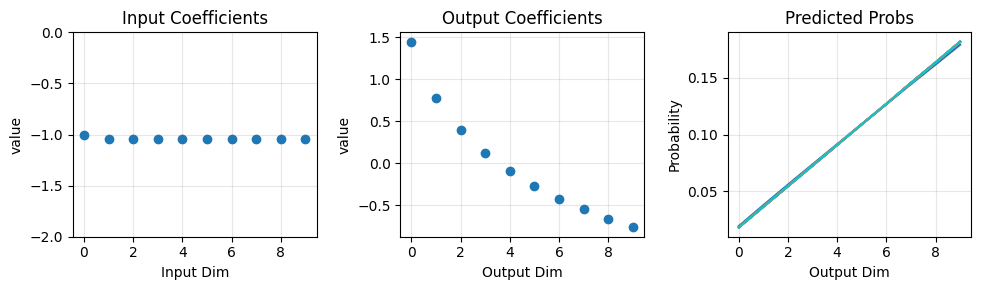

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.plot(model.embed.weight.detach().cpu().numpy(), 'o')
ax1.set_title('Input Coefficients')
ax1.set_xlabel('Input Dim')
ax1.set_ylabel('value')
ax1.set_ylim(-2,0)
ax1.grid(True, alpha=0.3)

ax2.plot((model.lm_head.weight.detach().cpu().numpy()), 'o')
ax2.set_title('Output Coefficients')
ax2.set_xlabel('Output Dim')
ax2.set_ylabel('value')
ax2.grid(True, alpha=0.3)

# Right subplot - Scatter plot
preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1).cpu().detach()

ax3.set_title('Predicted Probs')
for pred in preds:
  ax3.plot(pred)
ax3.set_xlabel('Output Dim')
ax3.set_ylabel('Probability')
ax3.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Add A second dimension

In [ ]:
class Model(nn.Module):
  def __init__(self, d_vocab, d_model):
    super().__init__()
    self.embed = nn.Embedding(d_vocab,d_model)
    self.lm_head = nn.Linear(d_model,d_vocab, bias=False)
    with torch.no_grad():
      self.lm_head.weight.zero_()

  def forward(self,x ,y):
    x = self.embed(x)
    x = self.lm_head(x)
    #print(x)
    loss = F.cross_entropy(x, y)
    return loss
d_vocab = 10
d_model = 2
probs = torch.tensor([(i+1)/d_vocab for i in range(d_vocab)])  # example probabilities


model = Model(d_vocab, d_model).cuda()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(10000):
  data = torch.multinomial(probs, num_samples=100000, replacement=True)
  input = data[:-1].cuda()
  target = data[1:].cuda()
  loss = model(input, target)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if step%1000==0:
    print(loss)

preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1)
print("Embed:", model.embed.weight)
print("Lm_head:", model.lm_head.weight)
print("Preds:", preds)

tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1551, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1535, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1490, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1510, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1507, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1511, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1513, device='cuda:0', grad_fn=<NllLossBackward0>)
Embed: Parameter containing:
tensor([[ 0.3676, -0.9846],
        [ 1.1167, -0.3621],
        [ 1.6820,  0.1197],
        [ 0.7586, -0.6689],
        [-0.0655, -1.3738],
        [ 0.9961, -0.4669],
        [ 0.5805, -0.8204],
        [-0.1683, -1.4596],
        [ 1.2478, -0.2498],
        [-0.3024, -1.5745]], device='cuda:0', requires_grad=True)
Lm_head: Parameter containing:
tensor([[-0.9793,  1.1

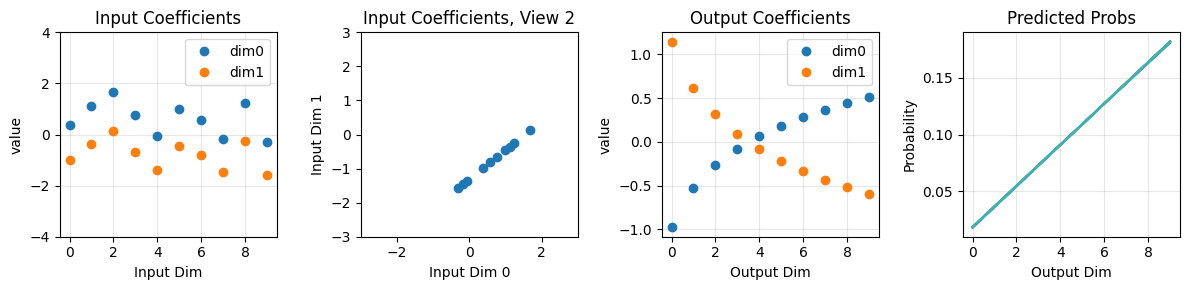

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

rows = model.embed.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax1.plot(row, 'o', label=f'dim{idx}')
ax1.set_title('Input Coefficients')
ax1.set_xlabel('Input Dim')
ax1.set_ylabel('value')
ax1.set_ylim(-4, 4)
ax1.grid(True, alpha=0.3)
ax1.legend()

x = model.embed.weight[:,0].cpu().detach().numpy()
y = model.embed.weight[:,1].cpu().detach().numpy()
ax2.set_title('Input Coefficients, View 2')
ax2.plot(x,y,'o')
ax2.set_ylim(-3, 3)
ax2.set_xlim(-3, 3)
ax2.set_xlabel('Input Dim 0')
ax2.set_ylabel('Input Dim 1')

rows = model.lm_head.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax3.plot(row, 'o', label=f'dim{idx}')
ax3.set_title('Output Coefficients')
ax3.set_xlabel('Output Dim')
ax3.set_ylabel('value')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Right subplot - Scatter plot
preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1).cpu().detach()

ax4.set_title('Predicted Probs')
for pred in preds:
  ax4.plot(pred)
ax4.set_xlabel('Output Dim')
ax4.set_ylabel('Probability')
ax4.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
# how do we get the outputs?
# we pick two input numbers

# and we multiply by the two outputs
# so I should be able to take

When we have a unigram distribution and two model dimensions, the model dimensions spread the impact out and there is no priveged basis. What happens if we initialize the embedding dim0 to -10?

In [ ]:
class Model(nn.Module):
  def __init__(self, d_vocab, d_model):
    super().__init__()
    self.embed = nn.Embedding(d_vocab,d_model)
    self.lm_head = nn.Linear(d_model,d_vocab, bias=False)
    with torch.no_grad():
      self.lm_head.weight.zero_()
      self.embed.weight[:, 0] = 10

  def forward(self,x ,y):
    x = self.embed(x)
    x = self.lm_head(x)
    #print(x)
    loss = F.cross_entropy(x, y)
    return loss
d_vocab = 10
d_model = 2
probs = torch.tensor([(i+1)/d_vocab for i in range(d_vocab)])  # example probabilities


model = Model(d_vocab, d_model).cuda()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(10000):
  data = torch.multinomial(probs, num_samples=100000, replacement=True)
  input = data[:-1].cuda()
  target = data[1:].cuda()
  loss = model(input, target)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if step%1000==0:
    print(loss)

preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1)
print("Embed:", model.embed.weight)
print("Lm_head:", model.lm_head.weight)
print("Preds:", preds)

tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1527, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1550, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1506, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1512, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1529, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1535, device='cuda:0', grad_fn=<NllLossBackward0>)
Embed: Parameter containing:
tensor([[ 9.9999e+00, -9.5923e-01],
        [ 9.9997e+00,  8.6978e-01],
        [ 9.9989e+00, -5.1794e-02],
        [ 9.9991e+00,  3.0415e-01],
        [ 9.9983e+00, -2.6756e-01],
        [ 9.9983e+00, -1.2483e+00],
        [ 9.9985e+00, -5.8198e-01],
        [ 9.9972e+00, -5.4306e-01],
        [ 9.9975e+00,  9.6463e-03],
        [ 9.9973e+00,  1.2045e+00]], device='cu

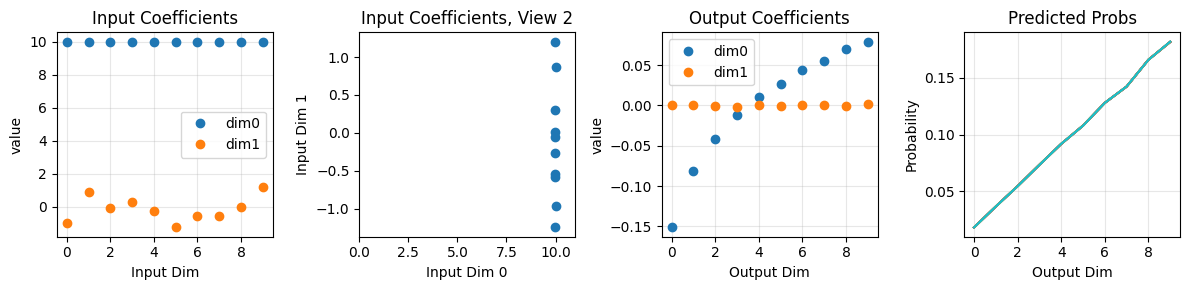

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

rows = model.embed.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax1.plot(row, 'o', label=f'dim{idx}')
ax1.set_title('Input Coefficients')
ax1.set_xlabel('Input Dim')
ax1.set_ylabel('value')
# ax1.set_ylim(-4, 4)
ax1.grid(True, alpha=0.3)
ax1.legend()

x = model.embed.weight[:,0].cpu().detach().numpy()
y = model.embed.weight[:,1].cpu().detach().numpy()
ax2.set_title('Input Coefficients, View 2')
ax2.plot(x,y,'o')
# ax2.set_ylim(-3, 3)
ax2.set_xlim(0,11)
ax2.set_xlabel('Input Dim 0')
ax2.set_ylabel('Input Dim 1')

rows = model.lm_head.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax3.plot(row, 'o', label=f'dim{idx}')
ax3.set_title('Output Coefficients')
ax3.set_xlabel('Output Dim')
ax3.set_ylabel('value')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Right subplot - Scatter plot
preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1).cpu().detach()

ax4.set_title('Predicted Probs')
for pred in preds:
  ax4.plot(pred)
ax4.set_xlabel('Output Dim')
ax4.set_ylabel('Probability')
ax4.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

The lm_head distribution responds only in dim0. To understand why, consider the scenario where we want to predict the likelihood of class0 as a function of x0 and x1 via y = c1*x1 + c2*x2. x1 is always 10, and x2 varies from -1 to 1. c1 and c2 are initialized to 0. We want to grow y to 0.1. Since x1 is always positive, we will increase our accuracy on every data sample if we scale up c1. Whereas if we scale up c2, we will decrease our prediction on some samples and increase our prediction on others. The two takeaways here are: 1) the more uniform the input is, the easier it is to apply a generic rule across the inputs and 2) the bigger the input magnitude, the faster that dimension will respond.

Next, I will try to add a simple bigram distribution: where 3 is always followed by 9, and the rest maintains the base unigram distribution.

In [ ]:
class Model(nn.Module):
  def __init__(self, d_vocab, d_model):
    super().__init__()
    self.embed = nn.Embedding(d_vocab,d_model)
    self.lm_head = nn.Linear(d_model,d_vocab, bias=False)
    with torch.no_grad():
      self.lm_head.weight.zero_()

  def forward(self,x ,y):
    x = self.embed(x)
    x = self.lm_head(x)
    #print(x)
    loss = F.cross_entropy(x, y)
    return loss
d_vocab = 10
d_model = 2
probs = torch.tensor([(i+1)/d_vocab for i in range(d_vocab)])  # example probabilities
probs[-1]=0
data = torch.multinomial(probs, num_samples=100000, replacement=True)
data[1:][(data==3)[:-1]] = d_vocab-1
model = Model(d_vocab, d_model).cuda()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(10000):
  data = torch.multinomial(probs, num_samples=100000, replacement=True)
  data[1:][(data==3)[:-1]] = d_vocab-1
  input = data[:-1].cuda()
  target = data[1:].cuda()
  loss = model(input, target)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if step%1000==0:
    print(loss)

preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1)
print("Embed:", model.embed.weight)
print("Lm_head:", model.lm_head.weight)
print("Preds:", preds)

tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8957, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8987, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8936, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8934, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8940, device='cuda:0', grad_fn=<NllLossBackward0>)
Embed: Parameter containing:
tensor([[ 1.1638,  0.4179],
        [ 1.2404,  0.3680],
        [ 1.3405,  0.2769],
        [-2.1253,  2.0586],
        [ 1.5621,  0.0766],
        [ 1.5972,  0.0451],
        [ 1.4858,  0.1448],
        [ 1.5049,  0.1293],
        [ 1.5464,  0.0926],
        [ 0.3046,  1.1734]], device='cuda:0', requires_grad=True)
Lm_head: Parameter containing:
tensor([[-0.4691, -1.0

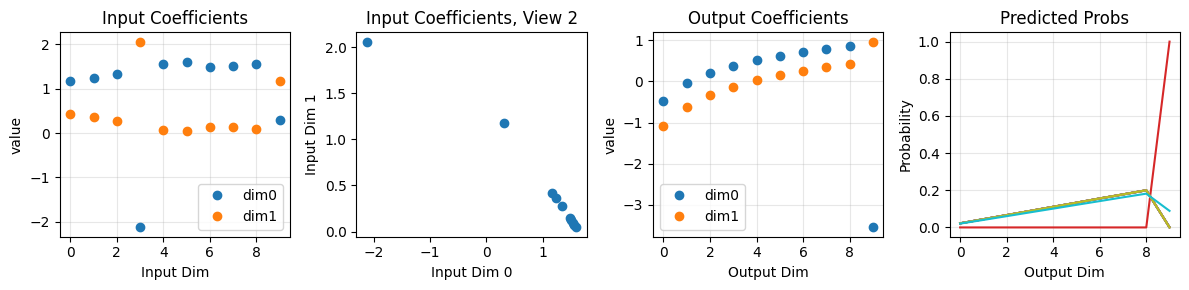

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

rows = model.embed.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax1.plot(row, 'o', label=f'dim{idx}')
ax1.set_title('Input Coefficients')
ax1.set_xlabel('Input Dim')
ax1.set_ylabel('value')
# ax1.set_ylim(-4, 4)
ax1.grid(True, alpha=0.3)
ax1.legend()

x = model.embed.weight[:,0].cpu().detach().numpy()
y = model.embed.weight[:,1].cpu().detach().numpy()
ax2.set_title('Input Coefficients, View 2')
ax2.plot(x,y,'o')
# ax2.set_ylim(-3, 3)
#ax2.set_xlim(0,11)
ax2.set_xlabel('Input Dim 0')
ax2.set_ylabel('Input Dim 1')

rows = model.lm_head.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax3.plot(row, 'o', label=f'dim{idx}')
ax3.set_title('Output Coefficients')
ax3.set_xlabel('Output Dim')
ax3.set_ylabel('value')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Right subplot - Scatter plot
preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1).cpu().detach()

ax4.set_title('Predicted Probs')
for pred in preds:
  ax4.plot(pred)
ax4.set_xlabel('Output Dim')
ax4.set_ylabel('Probability')
ax4.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Here I can see the standard mixed response. Both dimensions share the load of both tasks, and there is no reason for a privileged basis to exist in the residual stream.

In [ ]:
class Model(nn.Module):
  def __init__(self, d_vocab, d_model):
    super().__init__()
    self.embed = nn.Embedding(d_vocab,d_model)
    self.lm_head = nn.Linear(d_model,d_vocab, bias=False)
    with torch.no_grad():
      self.lm_head.weight.zero_()
      self.embed.weight[:, 0] = 10

  def forward(self,x ,y):
    x = self.embed(x)
    x = self.lm_head(x)
    #print(x)
    loss = F.cross_entropy(x, y)
    return loss
d_vocab = 10
d_model = 2
probs = torch.tensor([(i+1)/d_vocab for i in range(d_vocab)])  # example probabilities
probs[-1]=0
data = torch.multinomial(probs, num_samples=100000, replacement=True)
data[1:][(data==3)[:-1]] = d_vocab-1
model = Model(d_vocab, d_model).cuda()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(10000):
  data = torch.multinomial(probs, num_samples=100000, replacement=True)
  data[1:][(data==3)[:-1]] = d_vocab-1
  input = data[:-1].cuda()
  target = data[1:].cuda()
  loss = model(input, target)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if step%1000==0:
    print(loss)

preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1)
print("Embed:", model.embed.weight)
print("Lm_head:", model.lm_head.weight)
print("Preds:", preds)

tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9194, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8973, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8967, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8946, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8945, device='cuda:0', grad_fn=<NllLossBackward0>)
Embed: Parameter containing:
tensor([[10.0645,  0.3732],
        [10.0465,  0.0285],
        [10.1751,  0.1262],
        [ 9.6708,  4.2382],
        [10.0619, -0.2409],
        [10.0641, -0.3002],
        [10.0452, -0.4500],
        [10.1453, -0.2558],
        [10.0548, -0.4860],
        [ 9.6573,  1.5852]], device='cuda:0', requires_grad=True)
Lm_head: Parameter containing:
tensor([[-0.0827, -0.3

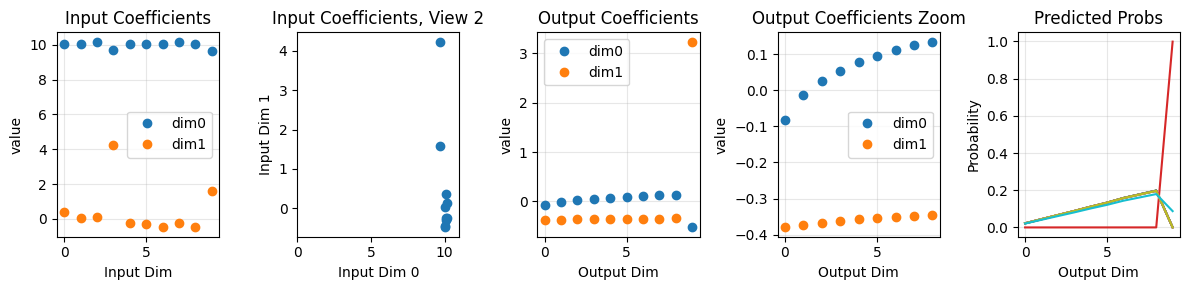

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))

rows = model.embed.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax1.plot(row, 'o', label=f'dim{idx}')
ax1.set_title('Input Coefficients')
ax1.set_xlabel('Input Dim')
ax1.set_ylabel('value')
# ax1.set_ylim(-4, 4)
ax1.grid(True, alpha=0.3)
ax1.legend()

x = model.embed.weight[:,0].cpu().detach().numpy()
y = model.embed.weight[:,1].cpu().detach().numpy()
ax2.set_title('Input Coefficients, View 2')
ax2.plot(x,y,'o')
# ax2.set_ylim(-3, 3)
ax2.set_xlim(0,11)
ax2.set_xlabel('Input Dim 0')
ax2.set_ylabel('Input Dim 1')

rows = model.lm_head.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax3.plot(row, 'o', label=f'dim{idx}')
ax3.set_title('Output Coefficients')
ax3.set_xlabel('Output Dim')
ax3.set_ylabel('value')
ax3.grid(True, alpha=0.3)
ax3.legend()

rows = model.lm_head.weight.detach().cpu().numpy().T
for idx, row in enumerate(rows):
  ax4.plot(row[:-1], 'o', label=f'dim{idx}')
ax4.set_title('Output Coefficients Zoom')
ax4.set_xlabel('Output Dim')
ax4.set_ylabel('value')
ax4.grid(True, alpha=0.3)
ax4.legend()

# Right subplot - Scatter plot
preds = F.softmax(model.embed.weight @ model.lm_head.weight.T, dim=-1).cpu().detach()

ax5.set_title('Predicted Probs')
for pred in preds:
  ax5.plot(pred)
ax5.set_xlabel('Output Dim')
ax5.set_ylabel('Probability')
ax5.grid(True, alpha=0.3)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()